In [1]:
datafile = '../data/all_frames.pkl.xz' # FG/UBICOMP data N=151
clusterfile = '../data/bmm_clusters_5_iternum1_sorted.csv'
newcolname = 'AU06_AU12_cluster'

CONFIDENCE_TOL = 0.90 # only use data with conf > this

#-----------------

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.3f}'.format
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
# import in scripts dir
import sys
sys.path.append('../scripts')
import compare 

if '.csv' in datafile:
    df = pd.read_csv(datafile, skipinitialspace=True)
else:
    df = pd.read_pickle(datafile)

def load_and_plot(clusterfile):
    if 'face_clusters' in clusterfile:
        # this is a kmeans cluster
        print('...calculating predictions from kmeans clusters')
        clusters_kd = pd.read_csv(clusterfile, skipinitialspace=True)
        k,d = clusters_kd.shape
        feats = list(clusters_kd.columns)

        dists = []
        for ki in range(k):
            dist = ((clusters_kd.iloc[ki,:] - df[feats])**2).sum(axis=1)
            dists.append(dist)
        dmat = np.vstack(dists)
        df[newcolname] = np.argmin(dmat, axis = 0)
        #z = df.apply(get_cluster, axis=1)
    elif 'bmm' in clusterfile:
        # this is a BetaMixture cluster
        import beta
        print('...calculating predictions from BetaMixture clusters')
        bmm = beta.BetaMixture()
        bmm.read_bm(clusterfile)
        bmm.plot()
        feats = ['AU06_r','AU12_r']
        X_nd = beta.Beta.rescale_data(df[feats].values.reshape((df.shape[0],2))/5)
        df[newcolname] = bmm.predict(X_nd)
        bmm.plot_data(X_nd)


![title](../data/clusters_AU06_r_AU12_r_5.png)

...calculating predictions from BetaMixture clusters


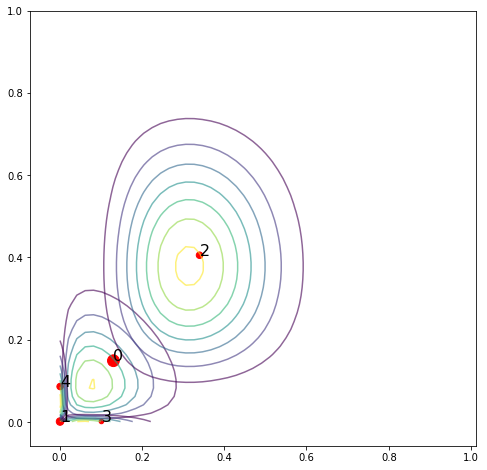

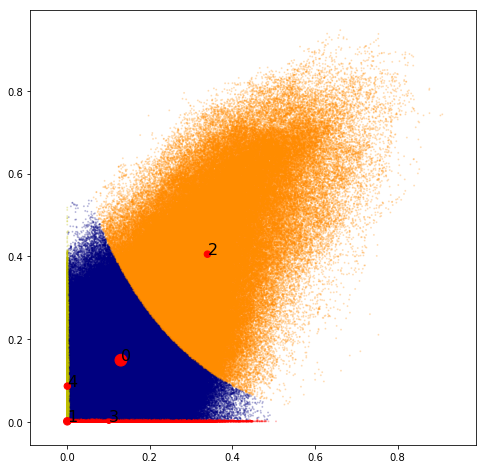

In [2]:
clusterfile = '../data/bmm_clusters_5_iternum1_sorted.csv'
load_and_plot(clusterfile)

...calculating predictions from BetaMixture clusters


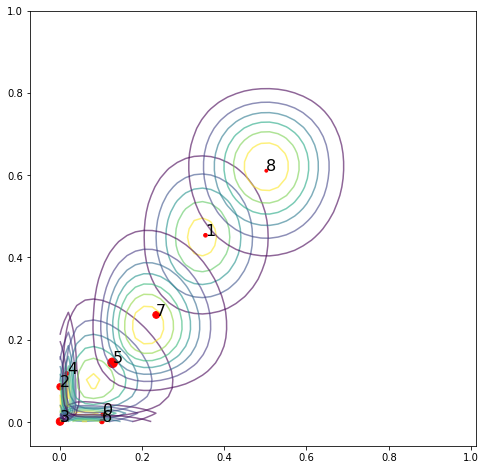

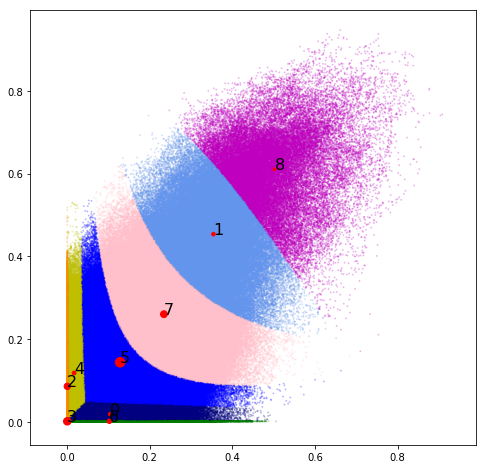

In [4]:
clusterfile = '../data/bmm_clusters_9_iternum2.csv'
load_and_plot(clusterfile)